# Heart Disease Diagnosing and Prediction




## Phase 1: Data Preparation

In [4]:
#imorting basic data preperation and exploration libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Source "https://archive.ics.uci.edu/dataset/45/heart+disease"

In [5]:
#loading data
heart_disease_df = pd.read_csv('Heart_disease_cleveland_new.csv')

In [6]:
#dataset_overview
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


**Data Discribtion**

Variable Name : Description

age : age in year

sex : gender

cp : Ceruloplasmin protein

trestbps : resting blood pressure in mm Hg

chol : serum cholestoral

fbs : 	fasting blood sugar  > 120 mg/dl

restecg : resting electrocardiographic results

thalach : maximum heart rate achieved

exang : exercise induced angina

oldpeak : ST depression induced by exercise relative to rest

slope : The slope of the ST segment in relation to heart rate

ca : number of major vessels (0-3) colored by flourosopy

thal : Thalassemia

target : result

In [7]:
#dataset shape
heart_disease_df.shape

(303, 14)

In [8]:
#columns information and datatypes
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#basic statistical information
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [10]:
#number of missing values
heart_disease_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
#number of duplicated values
heart_disease_df.duplicated().sum()

np.int64(0)

In [12]:
#checking for unique values in each column
for col in heart_disease_df.columns:
  print(f'{col} : {heart_disease_df[col].unique()}')
  print('###########################')

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
###########################
sex : [1 0]
###########################
cp : [0 3 2 1]
###########################
trestbps : [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
###########################
chol : [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 

In [13]:
for col in heart_disease_df.columns:
  print(f'{col} : {heart_disease_df[col].nunique()}')

age : 41
sex : 2
cp : 4
trestbps : 50
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 4
thal : 3
target : 2


In [14]:
for col in heart_disease_df.columns:
  print(f"frequancy of unique values in {col}")
  print(heart_disease_df[col].value_counts())
  print('###########################')


frequancy of unique values in age
age
58    19
57    17
54    16
59    14
52    13
51    12
60    12
62    11
56    11
44    11
41    10
64    10
63     9
67     9
53     8
61     8
43     8
45     8
55     8
65     8
42     8
46     7
66     7
48     7
50     7
49     5
47     5
70     4
39     4
68     4
35     4
40     3
69     3
71     3
37     2
34     2
38     2
29     1
77     1
74     1
76     1
Name: count, dtype: int64
###########################
frequancy of unique values in sex
sex
1    206
0     97
Name: count, dtype: int64
###########################
frequancy of unique values in cp
cp
3    144
2     86
1     50
0     23
Name: count, dtype: int64
###########################
frequancy of unique values in trestbps
trestbps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
125    11
160    11
112     9
132     8
118     7
124     6
135     6
108     6
134     5
145     5
152     5
170     4
100     4
122     4
105     3
115     3
126     3
142     3
180  

In [15]:
#setting binary valued columns as type bool
heart_disease_df['sex'] = heart_disease_df['sex'].astype('bool')
heart_disease_df['fbs'] = heart_disease_df['fbs'].astype('bool')
heart_disease_df['exang'] = heart_disease_df['exang'].astype('bool')
heart_disease_df['target'] = heart_disease_df['target'].astype('bool')
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    bool   
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    bool   
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    bool   
dtypes: bool(4), float64(1), int64(9)
memory usage: 25.0 KB


Phase 2:Exploratory Data Analysis (EDA) & Feature Building

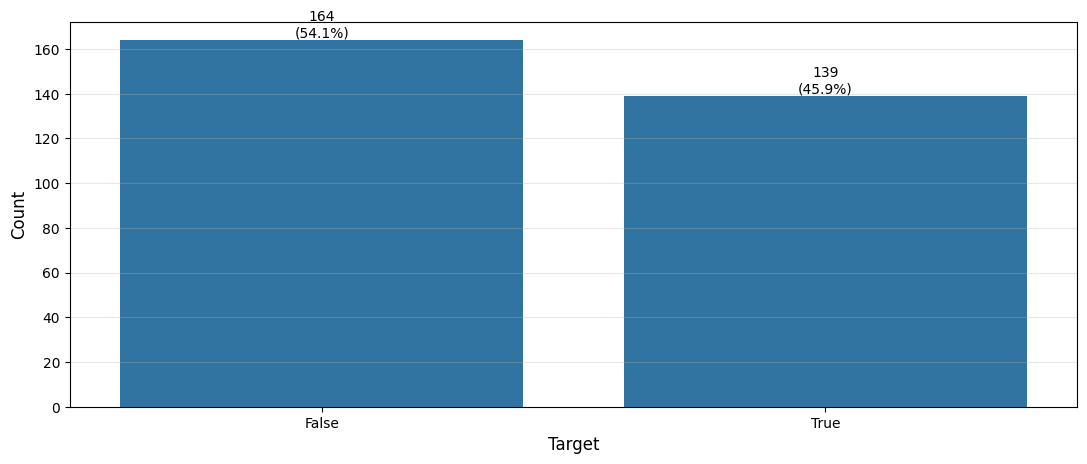

In [22]:
plt.figure(figsize=(13, 5))
t = sns.countplot(x="target", data=heart_disease_df)

for p in t.patches:
    height = p.get_height()
    t.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{int(height)}\n({height/len(heart_disease_df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [16]:
#scalling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
heart_disease_df[['trestbps', 'chol', 'thalach']] = scaler.fit_transform(heart_disease_df[[ 'trestbps', 'chol', 'thalach']])

